<a href="https://colab.research.google.com/github/pkv-woodstock/commodity_crop_price_predictor/blob/main/onion_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the data
data = pd.read_csv('/content/onion_train.csv')
test_data = pd.read_csv('/content/onion_test.csv')


In [3]:
# EDA
print("Data Overview:\n", data.head())
print("\nData Info:\n", data.info())
print("\nDescriptive Statistics:\n", data.describe())

Data Overview:
    Sl no. District Name Market Name Commodity           Variety Grade  \
0       1     Bangalore   Bangalore     Onion  Bangalore-Samall   FAQ   
1       2     Bangalore   Bangalore     Onion  Bangalore-Samall   FAQ   
2       3     Bangalore   Bangalore     Onion  Bangalore-Samall   FAQ   
3       4     Bangalore   Bangalore     Onion  Bangalore-Samall   FAQ   
4       5     Bangalore   Bangalore     Onion  Bangalore-Samall   FAQ   

   Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
0                      100                      200   
1                      200                      500   
2                      200                      600   
3                      200                      800   
4                      200                      800   

   Modal Price (Rs./Quintal) Price Date  
0                        150  20-Sep-22  
1                        400  20-Feb-23  
2                        500  21-Jul-22  
3                        600  17-Oct-22  
4   

In [4]:
# Check for missing values
data.isnull().sum()

Sl no.                       0
District Name                0
Market Name                  0
Commodity                    0
Variety                      0
Grade                        0
Min Price (Rs./Quintal)      0
Max Price (Rs./Quintal)      0
Modal Price (Rs./Quintal)    0
Price Date                   0
dtype: int64

In [5]:
data.columns

Index(['Sl no.', 'District Name', 'Market Name', 'Commodity', 'Variety',
       'Grade', 'Min Price (Rs./Quintal)', 'Max Price (Rs./Quintal)',
       'Modal Price (Rs./Quintal)', 'Price Date'],
      dtype='object')

In [6]:
# Convert Date column to datetime
data['Price Date'] = pd.to_datetime(data['Price Date'])
test_data['Price Date'] = pd.to_datetime(test_data['Price Date'])

<ipython-input-6-918b77e57de4>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Price Date'] = pd.to_datetime(data['Price Date'])
<ipython-input-6-918b77e57de4>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data['Price Date'] = pd.to_datetime(test_data['Price Date'])


In [7]:
# Sort the data by Date
data.sort_values(by='Price Date', inplace=True)
test_data.sort_values(by='Price Date', inplace=True)

In [8]:
# Set Date as index
data.set_index('Price Date', inplace=True)
test_data.set_index('Price Date', inplace=True)

In [9]:
data.columns

Index(['Sl no.', 'District Name', 'Market Name', 'Commodity', 'Variety',
       'Grade', 'Min Price (Rs./Quintal)', 'Max Price (Rs./Quintal)',
       'Modal Price (Rs./Quintal)'],
      dtype='object')

In [10]:
data.head()

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal)
Price Date,,,,,,,,,
2022-01-01,1929,Bangalore,Bangalore,Onion,Local,FAQ,2000,2800,2400
2022-01-01,1053,Bangalore,Bangalore,Onion,Puna,FAQ,2000,3500,2750
2022-01-03,2185,Bangalore,Bangalore,Onion,Puna,FAQ,2000,3000,2500
2022-01-03,228,Bangalore,Bangalore,Onion,Local,FAQ,1800,2400,2100
2022-01-04,1501,Bangalore,Bangalore,Onion,Local,FAQ,1800,2400,2100


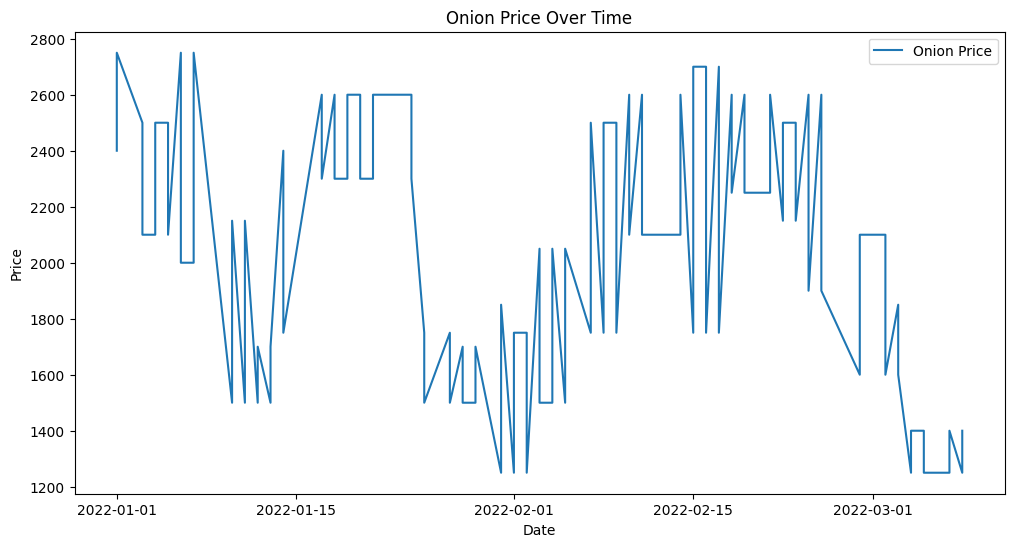

In [11]:
# Plot time series data
plt.figure(figsize=(12, 6))
plt.plot(data.index[:100], data['Modal Price (Rs./Quintal)'].iloc[:100], label='Onion Price') # Use .iloc to slice by position
plt.title('Onion Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

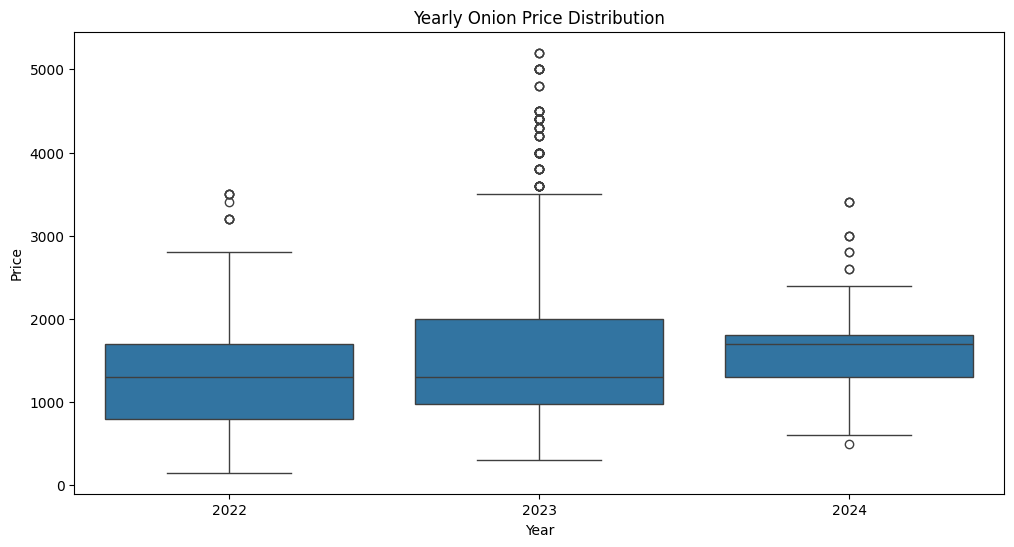

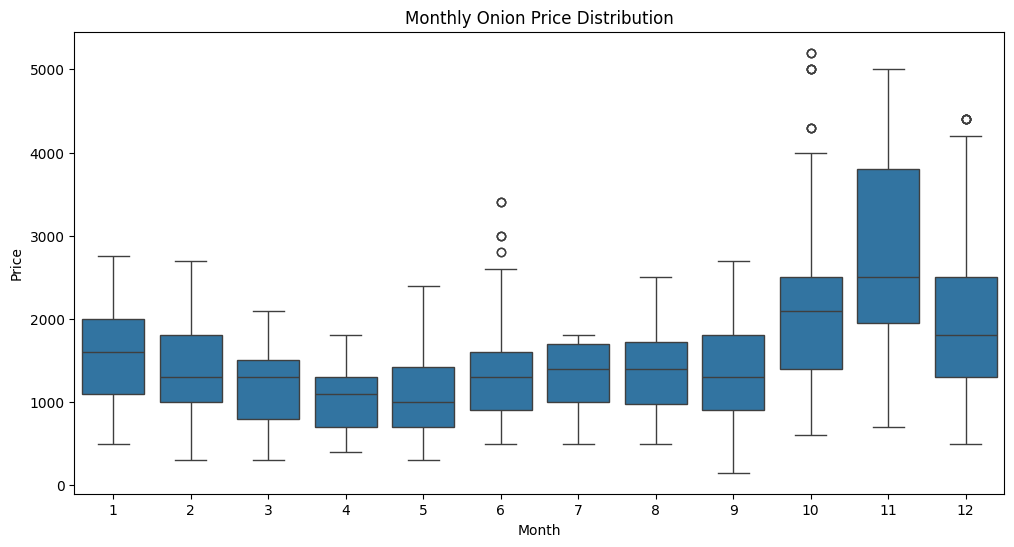

In [12]:
# Data Visualization: Monthly and yearly trends
data['Year'] = data.index.year
data['Month'] = data.index.month

plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Modal Price (Rs./Quintal)', data=data.reset_index())
plt.title('Yearly Onion Price Distribution')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Modal Price (Rs./Quintal)', data=data.reset_index())
plt.title('Monthly Onion Price Distribution')
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()

###Monthly Onion Price Distribution:

* Onion prices tend to fluctuate throughout the year, with certain months showing higher prices on average.

* The spread of prices also varies across months, indicating different levels of price volatility.


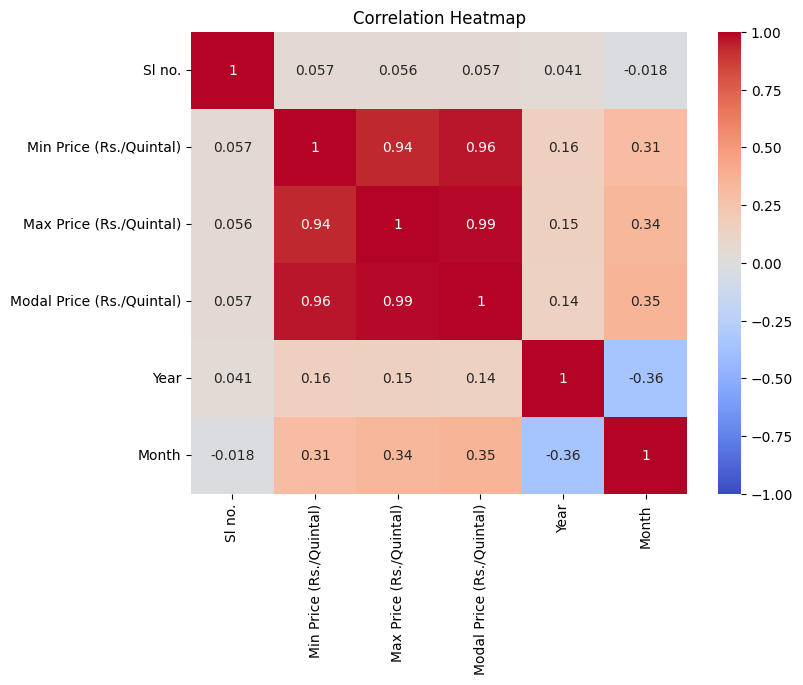

In [13]:
# Data Visualization: Correlation heatmap
plt.figure(figsize=(8, 6))
# Select only numerical columns for correlation calculation
numerical_data = data.select_dtypes(include=['number'])
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder

# Handle non-numerical columns (e.g., 'District Name', 'Market Name')
for col in data.select_dtypes(include=['object']):
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

In [15]:
from sklearn.preprocessing import LabelEncoder

# Handle non-numerical columns for test data(e.g., 'District Name', 'Market Name')
for col in test_data.select_dtypes(include=['object']):
    le = LabelEncoder()
    test_data[col] = le.fit_transform(test_data[col])

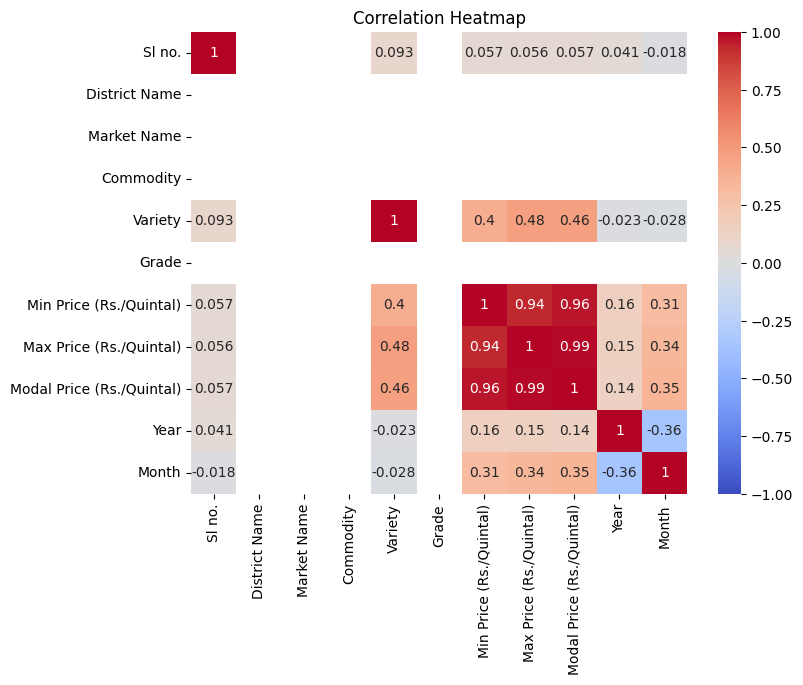

In [16]:
# Data Visualization: Correlation heatmap
plt.figure(figsize=(8, 6))
# Select only numerical columns for correlation calculation
numerical_data = data.select_dtypes(include=['number'])
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2256 entries, 2022-01-01 to 2024-06-14
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Sl no.                     2256 non-null   int64
 1   District Name              2256 non-null   int64
 2   Market Name                2256 non-null   int64
 3   Commodity                  2256 non-null   int64
 4   Variety                    2256 non-null   int64
 5   Grade                      2256 non-null   int64
 6   Min Price (Rs./Quintal)    2256 non-null   int64
 7   Max Price (Rs./Quintal)    2256 non-null   int64
 8   Modal Price (Rs./Quintal)  2256 non-null   int64
 9   Year                       2256 non-null   int32
 10  Month                      2256 non-null   int32
dtypes: int32(2), int64(9)
memory usage: 193.9 KB


In [18]:
# Feature Engineering
data['Day'] = data.index.day
data['DayOfWeek'] = data.index.dayofweek

test_data['Day'] = test_data.index.day
test_data['DayOfWeek'] = test_data.index.dayofweek

In [19]:
# Lag Features
for lag in range(1, 8):  # Lags for 1 to 7 days
    data[f'Lag_{lag}'] = data['Modal Price (Rs./Quintal)'].shift(lag)
    test_data[f'Lag_{lag}'] = test_data['Modal Price (Rs./Quintal)'].shift(lag)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2256 entries, 2022-01-01 to 2024-06-14
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Sl no.                     2256 non-null   int64  
 1   District Name              2256 non-null   int64  
 2   Market Name                2256 non-null   int64  
 3   Commodity                  2256 non-null   int64  
 4   Variety                    2256 non-null   int64  
 5   Grade                      2256 non-null   int64  
 6   Min Price (Rs./Quintal)    2256 non-null   int64  
 7   Max Price (Rs./Quintal)    2256 non-null   int64  
 8   Modal Price (Rs./Quintal)  2256 non-null   int64  
 9   Year                       2256 non-null   int32  
 10  Month                      2256 non-null   int32  
 11  Day                        2256 non-null   int32  
 12  DayOfWeek                  2256 non-null   int32  
 13  Lag_1                      225

In [21]:
# Rolling Statistics
data['Rolling_Mean'] = data['Modal Price (Rs./Quintal)'].rolling(window=7).mean()
data['Rolling_Std'] = data['Modal Price (Rs./Quintal)'].rolling(window=7).std()

test_data['Rolling_Mean'] = test_data['Modal Price (Rs./Quintal)'].rolling(window=7).mean()
test_data['Rolling_Std'] = test_data['Modal Price (Rs./Quintal)'].rolling(window=7).std()

In [22]:
data.shape

(2256, 22)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2256 entries, 2022-01-01 to 2024-06-14
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Sl no.                     2256 non-null   int64  
 1   District Name              2256 non-null   int64  
 2   Market Name                2256 non-null   int64  
 3   Commodity                  2256 non-null   int64  
 4   Variety                    2256 non-null   int64  
 5   Grade                      2256 non-null   int64  
 6   Min Price (Rs./Quintal)    2256 non-null   int64  
 7   Max Price (Rs./Quintal)    2256 non-null   int64  
 8   Modal Price (Rs./Quintal)  2256 non-null   int64  
 9   Year                       2256 non-null   int32  
 10  Month                      2256 non-null   int32  
 11  Day                        2256 non-null   int32  
 12  DayOfWeek                  2256 non-null   int32  
 13  Lag_1                      225

In [24]:
data.isna().sum()

Sl no.                       0
District Name                0
Market Name                  0
Commodity                    0
Variety                      0
Grade                        0
Min Price (Rs./Quintal)      0
Max Price (Rs./Quintal)      0
Modal Price (Rs./Quintal)    0
Year                         0
Month                        0
Day                          0
DayOfWeek                    0
Lag_1                        1
Lag_2                        2
Lag_3                        3
Lag_4                        4
Lag_5                        5
Lag_6                        6
Lag_7                        7
Rolling_Mean                 6
Rolling_Std                  6
dtype: int64

In [25]:
# Handle missing values (NaN) in lag features
# Drop NaN values created by shifting/rolling
data.dropna(inplace=True)
test_data.dropna(inplace=True)

In [26]:
data.isna().sum()

Sl no.                       0
District Name                0
Market Name                  0
Commodity                    0
Variety                      0
Grade                        0
Min Price (Rs./Quintal)      0
Max Price (Rs./Quintal)      0
Modal Price (Rs./Quintal)    0
Year                         0
Month                        0
Day                          0
DayOfWeek                    0
Lag_1                        0
Lag_2                        0
Lag_3                        0
Lag_4                        0
Lag_5                        0
Lag_6                        0
Lag_7                        0
Rolling_Mean                 0
Rolling_Std                  0
dtype: int64

In [27]:
test_data.isna().sum()

Sl no.                       0
District Name                0
Market Name                  0
Commodity                    0
Variety                      0
Grade                        0
Min Price (Rs./Quintal)      0
Max Price (Rs./Quintal)      0
Modal Price (Rs./Quintal)    0
Day                          0
DayOfWeek                    0
Lag_1                        0
Lag_2                        0
Lag_3                        0
Lag_4                        0
Lag_5                        0
Lag_6                        0
Lag_7                        0
Rolling_Mean                 0
Rolling_Std                  0
dtype: int64

In [28]:
data.shape, test_data.shape

((2249, 22), (77, 20))

In [29]:
data.columns

Index(['Sl no.', 'District Name', 'Market Name', 'Commodity', 'Variety',
       'Grade', 'Min Price (Rs./Quintal)', 'Max Price (Rs./Quintal)',
       'Modal Price (Rs./Quintal)', 'Year', 'Month', 'Day', 'DayOfWeek',
       'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6', 'Lag_7',
       'Rolling_Mean', 'Rolling_Std'],
      dtype='object')

In [30]:
# Define features and target
features = ['Year', 'Month', 'Day', 'DayOfWeek', 'Variety', 'Min Price (Rs./Quintal)', 'Max Price (Rs./Quintal)'] + [f'Lag_{lag}' for lag in range(1, 8)] + ['Rolling_Mean', 'Rolling_Std']
target = 'Modal Price (Rs./Quintal)'

In [31]:
test_data['Year'] = test_data.index.year
test_data['Month'] = test_data.index.month

In [32]:
set(data.columns) == set(test_data.columns)

True

In [33]:
# Train-Test Split
X_train = data[features]
y_train = data[target]

X_test = test_data[features]
y_test = test_data[target]

In [34]:
# Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [35]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 77 entries, 2024-06-19 to 2024-07-12
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Sl no.                     77 non-null     int64  
 1   District Name              77 non-null     int64  
 2   Market Name                77 non-null     int64  
 3   Commodity                  77 non-null     int64  
 4   Variety                    77 non-null     int64  
 5   Grade                      77 non-null     int64  
 6   Min Price (Rs./Quintal)    77 non-null     int64  
 7   Max Price (Rs./Quintal)    77 non-null     int64  
 8   Modal Price (Rs./Quintal)  77 non-null     int64  
 9   Day                        77 non-null     int32  
 10  DayOfWeek                  77 non-null     int32  
 11  Lag_1                      77 non-null     float64
 12  Lag_2                      77 non-null     float64
 13  Lag_3                      77 no

In [36]:
# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [37]:
# Evaluation
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')
print(f'Train R^2: {train_r2}')
print(f'Test R^2: {test_r2}')

Train RMSE: 20.654556782311296
Test RMSE: 153.99303197256654
Train R^2: 0.9993433679784736
Test R^2: 0.9253322146840148


In [38]:
# 1. Hyperparameter Tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}
# Initialize the model
model = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           cv=2,
                           scoring='neg_root_mean_squared_error',
                           n_jobs=-1)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Predictions using the best model
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# Evaluate the best model
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')
print(f'Train R^2: {train_r2}')
print(f'Test R^2: {test_r2}')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best Parameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Train RMSE: 31.275922550387165
Test RMSE: 152.51530973521707
Train R^2: 0.9984943967078028
Test R^2: 0.9267583680707289


Feature ranking:
1. Feature Max Price (Rs./Quintal) (0.9098656232806012)
2. Feature Min Price (Rs./Quintal) (0.08257555956516743)
3. Feature Rolling_Std (0.0014557362922249803)
4. Feature Month (0.0011614871558988018)
5. Feature Rolling_Mean (0.001102131882532187)
6. Feature Day (0.0007389143533833643)
7. Feature Variety (0.0005759689447152242)
8. Feature Year (0.00044922445706974655)
9. Feature Lag_4 (0.00041378658634905305)
10. Feature Lag_7 (0.00030865166320789237)
11. Feature Lag_1 (0.0003074166317418976)
12. Feature Lag_2 (0.00027342926843431075)
13. Feature Lag_3 (0.00024708584920720236)
14. Feature Lag_6 (0.00022450143250492196)
15. Feature Lag_5 (0.0001684081007404399)
16. Feature DayOfWeek (0.00013207453622133593)


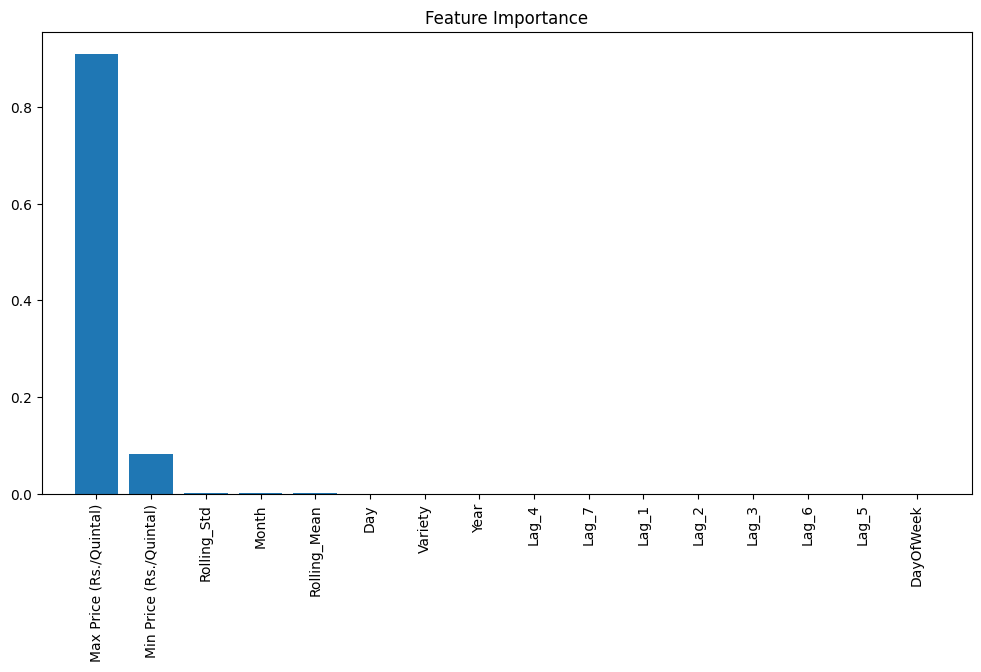

In [39]:
# 2. Feature Importance
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. Feature {X_train.columns[indices[f]]} ({importances[indices[f]]})")

# Plotting feature importance
plt.figure(figsize=(12, 6))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [X_train.columns[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

Index(['Min Price (Rs./Quintal)', 'Max Price (Rs./Quintal)'], dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Train RMSE (Feature Selection): 64.47781804157984
Test RMSE (Feature Selection): 139.08208242945244
Train R^2 (Feature Selection): 0.9936010169118902
Test R^2 (Feature Selection): 0.9390921177397126


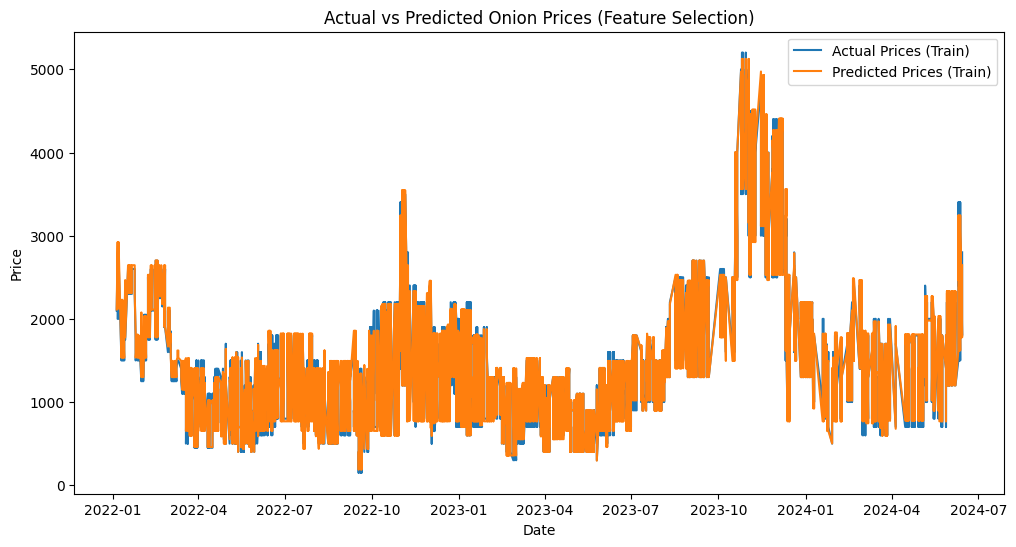

In [48]:
# 3. Feature Selection
threshold = 0.05
important_features = X_train.columns[importances > threshold]
print(important_features)
# Train a new model using only the important features
X_train_selected = X_train[important_features]
X_test_selected = X_test[important_features]
model_fs_selected = RandomForestRegressor(random_state=42,
                                          max_depth=10,
                                          max_features='auto',
                                          min_samples_leaf=2,
                                          min_samples_split=2,
                                          n_estimators=100)
model_fs_selected.fit(X_train_selected, y_train)

# Predictions using the feature-selected model
y_pred_train_fs = model_fs_selected.predict(X_train_selected)
y_pred_test_fs = model_fs_selected.predict(X_test_selected)

# Evaluate the feature-selected model
train_rmse_fs = np.sqrt(mean_squared_error(y_train, y_pred_train_fs))
test_rmse_fs = np.sqrt(mean_squared_error(y_test, y_pred_test_fs))

train_r2_fs = r2_score(y_train, y_pred_train_fs)
test_r2_fs = r2_score(y_test, y_pred_test_fs)

print(f'Train RMSE (Feature Selection): {train_rmse_fs}')
print(f'Test RMSE (Feature Selection): {test_rmse_fs}')
print(f'Train R^2 (Feature Selection): {train_r2_fs}')
print(f'Test R^2 (Feature Selection): {test_r2_fs}')

# Plotting predictions of the feature-selected model
plt.figure(figsize=(12, 6))
plt.plot(data.index, y_train, label='Actual Prices (Train)')
plt.plot(data.index, y_pred_train_fs, label='Predicted Prices (Train)')
plt.title('Actual vs Predicted Onion Prices (Feature Selection)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

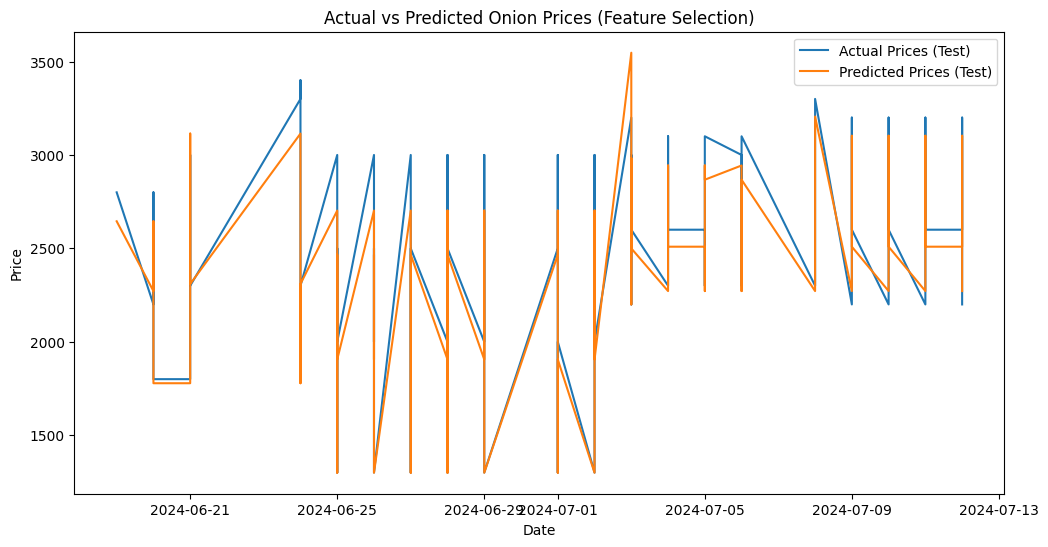

In [49]:
# Plotting predictions of the feature-selected model
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, y_test, label='Actual Prices (Test)')
plt.plot(test_data.index, y_pred_test_fs, label='Predicted Prices (Test)')
plt.title('Actual vs Predicted Onion Prices (Feature Selection)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()